In [1]:
#importing libraries for use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install mailbox

In [3]:
#loading download email data

import mailbox
mboxfile = "DrisMail.mbox"

mbox = mailbox.mbox(mboxfile)
mbox

In [4]:
#printing out all avaialble column in email data

for key in mbox[0].keys():
  print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
Received
From
To
Subject
Date
List-Unsubscribe
MIME-Version
List-ID
X-CSA-Complaints
X-SFMC-Stack
x-job
Message-ID
Feedback-ID
Content-Type


In [31]:
import csv

with open('mailbox.csv', 'w', encoding= 'utf-8') as outputfile:
  writer = csv.writer(outputfile)
  writer.writerow(['subject','from','date','to','label','thread'])
    
  for message in mbox:
    writer.writerow([message['subject'], message['from'],  message['date'], message['to'],  message['X-Gmail-Labels'], message['X-GM-THRID']])

In [32]:
#specifiying required columns to csv

dfs = pd.read_csv('mailbox.csv', names=['subject', 'from', 'date', 'to', 'label', 'thread'])

In [33]:
dfs.dtypes

subject    object
from       object
date       object
to         object
label      object
thread     object
dtype: object

In [34]:
dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

In [35]:
dfs = dfs[dfs['date'].notna()]

In [36]:
dfs.to_csv('gmail.csv')

In [12]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23523 entries, 1 to 23523
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  23486 non-null  object             
 1   from     23523 non-null  object             
 2   date     23523 non-null  datetime64[ns, UTC]
 3   to       23477 non-null  object             
 4   label    23523 non-null  object             
 5   thread   23523 non-null  object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 1.3+ MB


In [37]:
dfs.head(10)

,subject,from,date,to,label,thread
1,JumiaPay Account Upgrade,"""JumiaPay"" <info@mail.account.jumia.com>",2020-10-29 17:40:49+00:00,<idrishassan35@gmail.com>,"Inbox,Category Promotions,Unread",1681908858819769508
2,newline Pro sale ends tonight - new courses on...,Nate Murray <us@fullstack.io>,2020-10-30 14:23:58+00:00,idrishassan35@gmail.com,"Inbox,Category Updates,Unread",1681987043156539066
3,Microsoft is looking for: Internship Opportuni...,LinkedIn <jobs-listings@linkedin.com>,2020-10-29 17:20:53+00:00,Idris hassan <idrishassan35@gmail.com>,"Inbox,Category Social,Unread",1681907572242500856
4,=?utf-8?Q?Jumiapay=20=2D=20Get=20Your=20Bonus=...,=?utf-8?Q?The=20JForce=20Team?= <jforcereports...,2020-11-02 08:04:31+00:00,<idrishassan35@gmail.com>,"Inbox,Category Promotions,Unread",1682235221947095781
5,"Enjoy Shrimps Biryani for Just 3,500 Naira !!!...",Shrimps Biryani <sandeep@torrentnigeria.com>,2020-10-31 10:24:09+00:00,idrishassan35@gmail.com,"Inbox,Category Promotions,Unread",1682062549948390439
6,8 Habits of Quiet Winners | Tim Denning in The...,"""Medium Daily Digest"" <noreply@medium.com>",2020-10-31 07:40:00+00:00,idrishassan35@gmail.com,"Inbox,Category Promotions,Unread",1682052224167672630
7,V-Guard : New Stocks of MSA Certified Safety H...,MSA Certified Helmets <sandeep@torrentnigeria....,2020-10-26 08:02:29+00:00,idrishassan35@gmail.com,"Inbox,Category Promotions,Unread",1681600649562527521
8,Learn more about bitcoin's recent run up,"""Blockchain.com"" <newsletter@email.blockchain....",2020-11-02 08:55:23+00:00,idrishassan35@gmail.com,"Inbox,Category Updates,Unread",1682238156620045616
9,"Idris, do you know Halima Ibrahim?",LinkedIn <messages-noreply@linkedin.com>,2020-11-02 08:32:35+00:00,Idris hassan <idrishassan35@gmail.com>,"Inbox,Category Social,Unread",1682236722907419563
10,Don't Save All Your Money,Ope from Cowrywise <support@cowrywise.com>,2020-11-03 05:03:57+00:00,idrishassan35@gmail.com,"Inbox,Category Promotions,Unread",1682314193089037535


In [38]:
dfs.columns

Index(['subject', 'from', 'date', 'to', 'label', 'thread'], dtype='object')

In [39]:
#Using regular expression to refactor the from column
#Using a function to extract the email address

import re

def extract_email_ID(string):
  email = re.findall(r'<(.+?)>', string)
  if not email:
    email = list(filter(lambda y: '@' in y, string.split()))
  return email[0] if email else np.nan

In [40]:
# Applying the function to the from column
dfs['from'] = dfs['from'].apply(lambda x: extract_email_ID(x))

In [41]:
#refacoring the label field to display either sent or ibox

myemail = 'idrishassan35@gmail.com'
dfs['label'] = dfs['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

In [76]:
#Drop the 'to' column
dfs.drop(columns='to', inplace=True)


KeyError: "['to'] not found in axis"

In [77]:
dfs.head(10)

,subject,from,label,thread,dayofweek,timeofday,hour,year_int,year
date,,,,,,,,,
2020-10-29 18:40:49+01:00,JumiaPay Account Upgrade,info@mail.account.jumia.com,inbox,1681908858819769508,Thursday,18.680278,18,2020,2020.829569
2020-10-30 15:23:58+01:00,newline Pro sale ends tonight - new courses on...,us@fullstack.io,inbox,1681987043156539066,Friday,15.399444,15,2020,2020.832307
2020-10-29 18:20:53+01:00,Microsoft is looking for: Internship Opportuni...,jobs-listings@linkedin.com,inbox,1681907572242500856,Thursday,18.348056,18,2020,2020.829569
2020-11-02 09:04:31+01:00,=?utf-8?Q?Jumiapay=20=2D=20Get=20Your=20Bonus=...,jforcereports2.mall.ng@jumia.com,inbox,1682235221947095781,Monday,9.075278,9,2020,2020.840520
2020-10-31 11:24:09+01:00,"Enjoy Shrimps Biryani for Just 3,500 Naira !!!...",sandeep@torrentnigeria.com,inbox,1682062549948390439,Saturday,11.402500,11,2020,2020.835044
2020-10-31 08:40:00+01:00,8 Habits of Quiet Winners | Tim Denning in The...,noreply@medium.com,inbox,1682052224167672630,Saturday,8.666667,8,2020,2020.835044
2020-10-26 09:02:29+01:00,V-Guard : New Stocks of MSA Certified Safety H...,sandeep@torrentnigeria.com,inbox,1681600649562527521,Monday,9.041389,9,2020,2020.821355
2020-11-02 09:55:23+01:00,Learn more about bitcoin's recent run up,newsletter@email.blockchain.com,inbox,1682238156620045616,Monday,9.923056,9,2020,2020.840520
2020-11-02 09:32:35+01:00,"Idris, do you know Halima Ibrahim?",messages-noreply@linkedin.com,inbox,1682236722907419563,Monday,9.543056,9,2020,2020.840520


In [43]:
#refactor timezone to your local timezone

import datetime 
import pytz

def refactor_timezone(x):
  est = pytz.timezone('Africa/Lagos')
  return x.astimezone(est)

In [44]:
#
dfs['date'] = dfs['date'].apply(lambda x: refactor_timezone(x))

In [53]:
#creating days of the week

dfs['dayofweek'] = dfs['date'].apply(lambda x: x.day_name())


In [54]:
#refactoring and creating times of th day

dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [55]:
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)

In [56]:
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)

In [57]:
dfs['year'] = dfs['date'].apply(lambda x: x.year + x.dayofyear/365.25)

In [60]:
#Make date the dataset index

dfs.index = dfs['date']
del dfs['date']

In [61]:
dfs.head(3)

,subject,from,label,thread,dayofweek,timeofday,hour,year_int,year
date,,,,,,,,,
2020-10-29 18:40:49+01:00,JumiaPay Account Upgrade,info@mail.account.jumia.com,inbox,1681908858819769508,Thursday,18.680278,18,2020,2020.829569
2020-10-30 15:23:58+01:00,newline Pro sale ends tonight - new courses on...,us@fullstack.io,inbox,1681987043156539066,Friday,15.399444,15,2020,2020.832307
2020-10-29 18:20:53+01:00,Microsoft is looking for: Internship Opportuni...,jobs-listings@linkedin.com,inbox,1681907572242500856,Thursday,18.348056,18,2020,2020.829569


In [62]:
#check for info on received and sent messages
#data also checks for mail start and end dates

print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))

print(dfs['label'].value_counts())

Sun, 02 Feb 2014 07:13 AM
Tue, 03 Nov 2020 09:52 AM
inbox    23300
sent       223
Name: label, dtype: int64


In [63]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [64]:
def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
  ind = np.zeros(len(df), dtype='bool')
  est = pytz.timezone('US/Eastern')
    
  df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
  ax.set_ylim(0, 24)
  ax.yaxis.set_major_locator(MaxNLocator(8))
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);

  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_title(title)
  ax.grid(ls=':', color='k')

  return ax

In [65]:
sent = dfs[dfs['label']=='sent']
received = dfs[dfs['label']=='inbox']

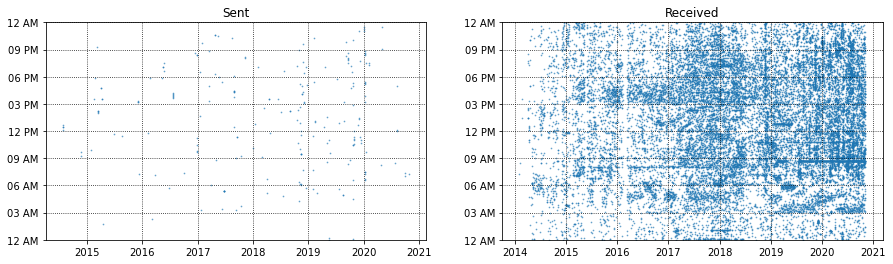

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')


In [67]:
def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')

In [68]:
from scipy import ndimage

def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False,
                      weight_fun=None, **plot_kwargs):

    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year'].notna()]['year'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs);


    ax.grid(ls=':', color='k')
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_xticks()]);
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_yticks()]);

In [69]:
class TriplePlot:
  def __init__(self):
    gs = gridspec.GridSpec(6, 6)
    self.ax1 = plt.subplot(gs[2:6, :4])
    self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
    plt.setp(self.ax2.get_yticklabels(), visible=False);
    self.ax3 = plt.subplot(gs[:2, :4])  
    plt.setp(self.ax3.get_xticklabels(), visible=False);

  def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
    plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
    plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
    self.ax2.set_xlabel('Average emails per hour')
    plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
    self.ax3.set_ylabel('Average emails per day')

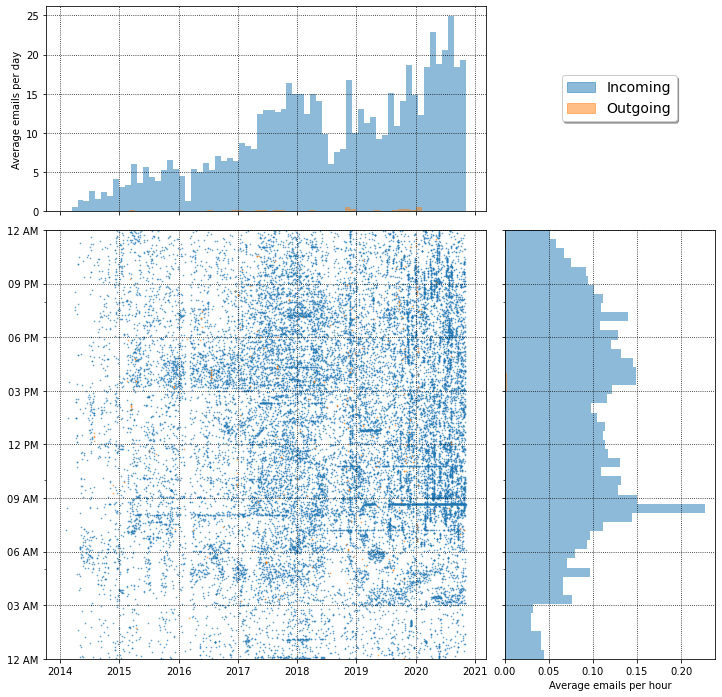

In [70]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

plt.figure(figsize=(12,12));
tpl = TriplePlot()

tpl.plot(received, color='C0', alpha=0.5)
tpl.plot(sent, color='C1', alpha=0.5)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.5)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.5)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=14, shadow=True);


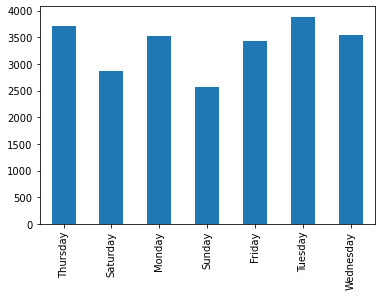

In [71]:
counts = dfs.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

In [78]:
addrs = received['from'].value_counts()

addrs[0:20]

notify@twitter.com                            4168
info@twitter.com                              1823
comment-reply@wordpress.com                   1727
notification+zj4y4=aj4ojc@facebookmail.com    1304
digest-noreply@quora.com                       893
noreply@medium.com                             671
notification@facebookmail.com                  566
messages-noreply@linkedin.com                  492
info@meetup.com                                472
service@news.jumia.com.ng                      406
notifications-noreply@linkedin.com             330
hello@boredpanda.com                           273
invitations@linkedin.com                       253
noreply@notifications.freelancer.com           241
ebusiness@fcmb.com                             233
no-reply@accounts.google.com                   224
UBA.Alert@ubagroup.com                         218
care@zoto.com.ng                               217
donotreply@jiji.ng                             193
noreply@nairaland.com          

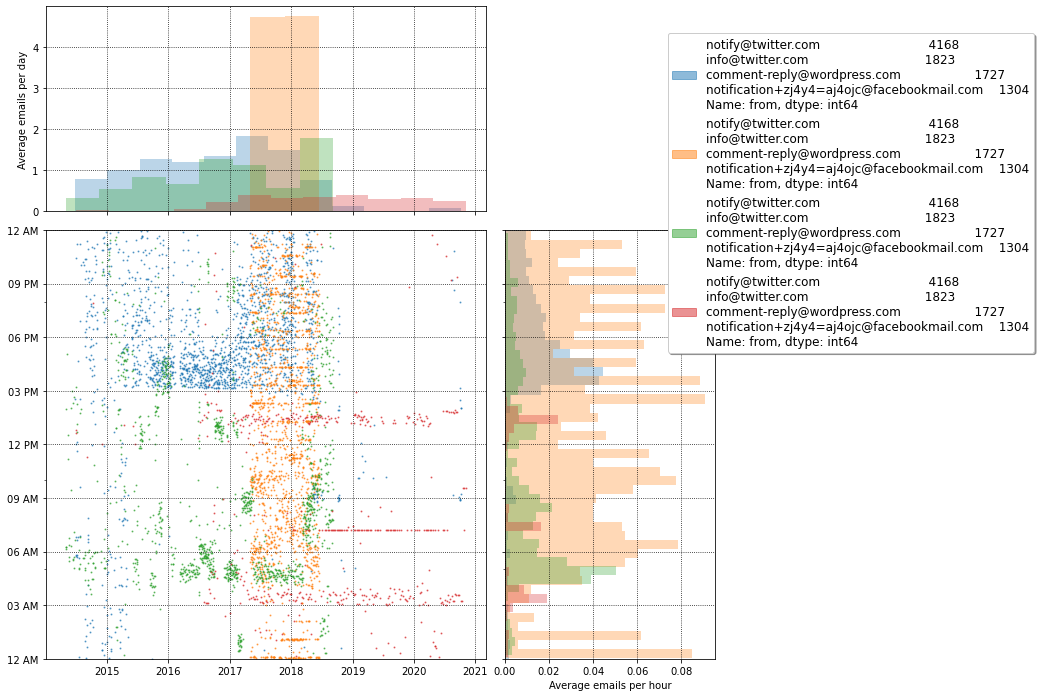

In [73]:
plt.figure(figsize=(12,12));

tpl = TriplePlot()

labels = []
colors = ['C{}'.format(ii) for ii in range(9)]
idx = np.array([1,2,3,7])
for ct, addr in enumerate(addrs.index[idx]):
    tpl.plot(dfs[dfs['from'] == addr], color=colors[ct], alpha=0.3, yr_bin=0.5, markersize=1.0)
    labels.append(mpatches.Patch(color=colors[ct], label=addrs[0:4], alpha=0.5))
plt.legend(handles=labels, bbox_to_anchor=[1.4, 0.9], fontsize=12, shadow=True);

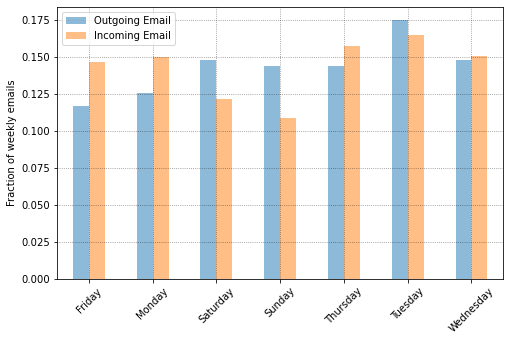

In [74]:
sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)

df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

AttributeError: Can only use .cat accessor with a 'category' dtype

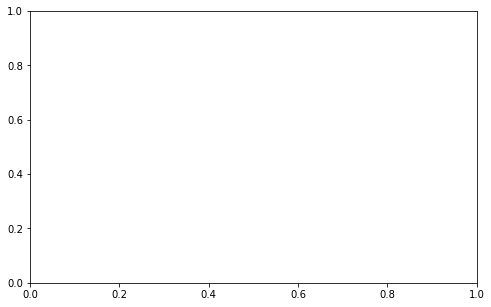

In [75]:
import scipy.ndimage
from scipy.interpolate import interp1d

plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for ct, dow in enumerate(dfs.dayofweek.cat.categories):
    df_r = received[received['dayofweek']==dow]
    weights = np.ones(len(df_r)) / len(received)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_r, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=3, label=dow, weight_fun=wfun)

    df_s = sent[sent['dayofweek']==dow]
    weights = np.ones(len(df_s)) / len(sent)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_s, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=2, label=dow, ls='--', weight_fun=wfun)
ax.set_ylabel('Fraction of weekly emails per hour')
plt.legend(loc='upper left')